## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. You can add more notebook cells or edit existing notebook cells other than "# YOUR CODE HERE" to test out or debug your code. We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Dimensionality Reduction

In this exercise you'll apply a variety of dimensionality reduction to a relatively high dimensional dataset and investigate how they perform in visualizing the data as well as working with a simple supervised learning algorithm.


In [75]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import scipy

np.random.seed(0)
plt.style.use("ggplot")

In [76]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, SpectralEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score


In [77]:
data = load_breast_cancer()

In [78]:
features = pd.DataFrame(data["data"], columns=data["feature_names"])
target = pd.Series(data["target"], name="class")
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [79]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [80]:
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [81]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [83]:
perplexities = [5, 20, 30, 50, 100]
iters = [250, 1000, 3000]

The next code block will take some time to run, you might want to come back to this later or continue to the next part while it runs.

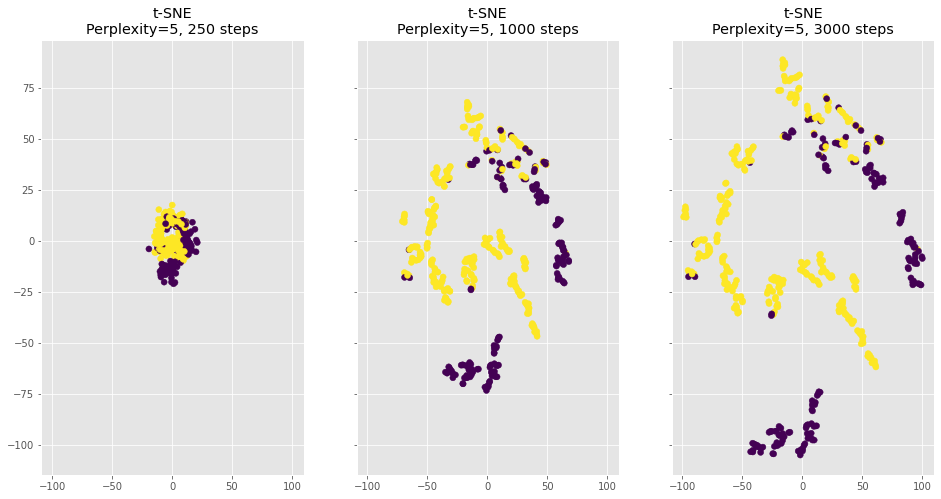

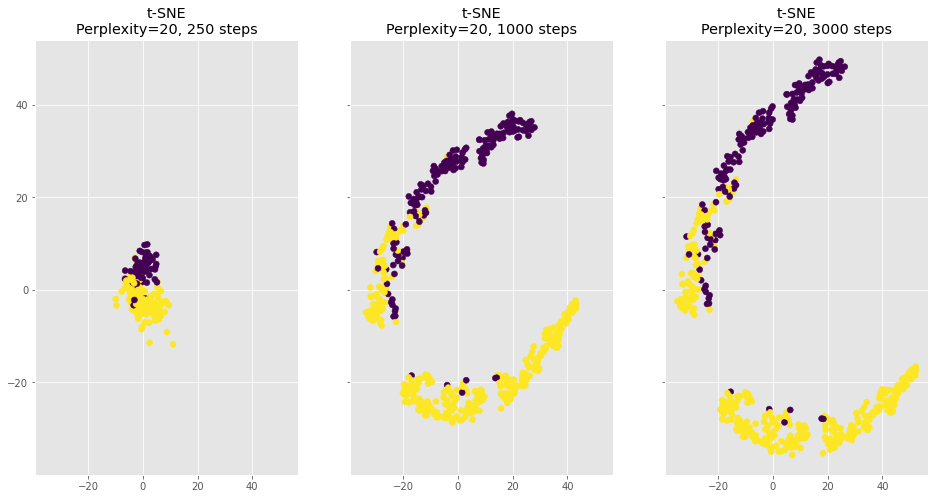

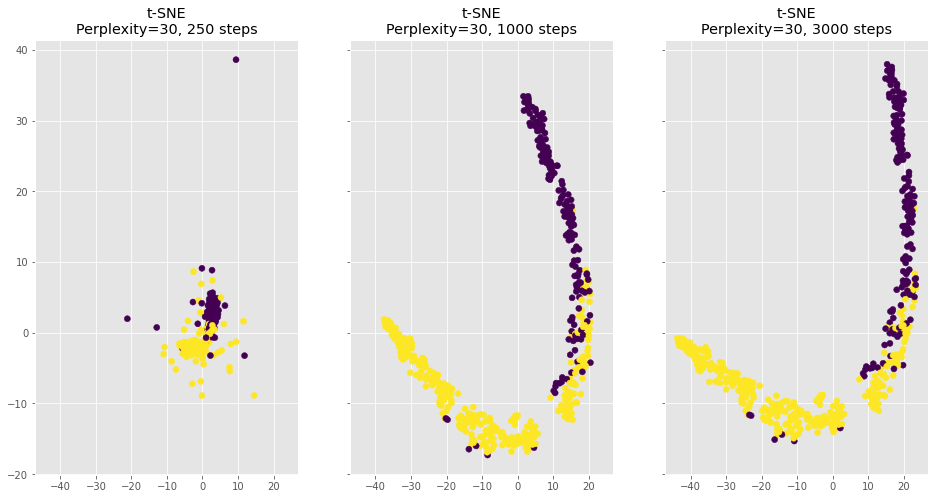

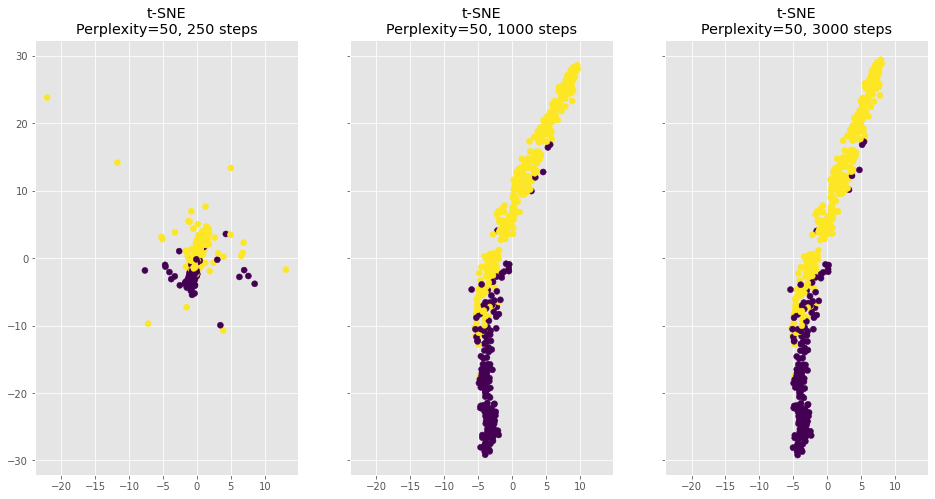

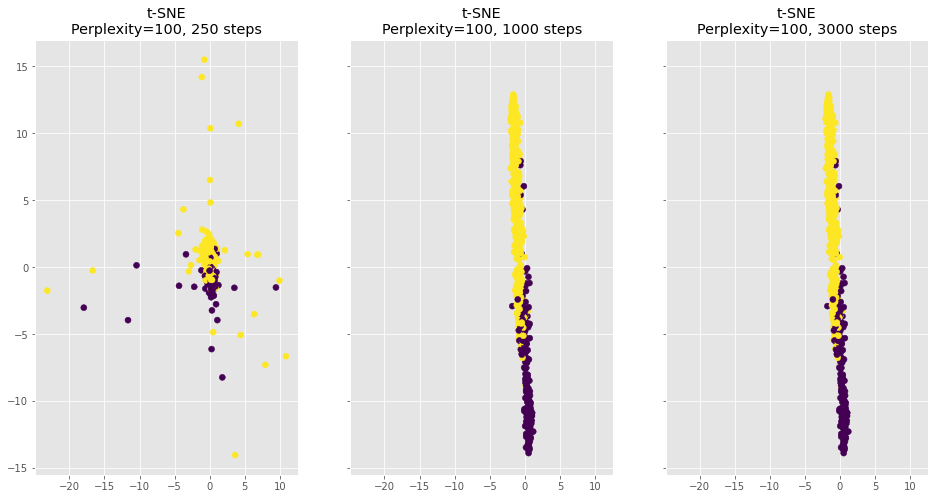

In [84]:
tsne_embeddings = []
for perplexity in perplexities:
    fig, axes = plt.subplots(nrows=1, ncols=len(iters), figsize=(16, 8), sharex=True, sharey=True)
    for i,n in enumerate(iters):
        # Create an embedding using t-SNE using number of iterations (n), a random state of 0 and specified perplexity
        # Save that embedding to tsne_embedding
        tsne_embedding = TSNE(n_iter=n, random_state=0, perplexity=perplexity).fit_transform(X_train)
        #raise NotImplementedError()
        axes[i].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=y_train)
        axes[i].set_title(f"t-SNE\nPerplexity={perplexity}, {n} steps")
    tsne_embeddings.append(tsne_embedding)
    plt.show()

In [85]:
assert tsne_embedding.shape == (455,2)
assert len(tsne_embeddings) == 5

Next, we'll calculate the spectral embedding for the data.

> *Optional* - select an affinity to create the affinity matrix for the manifold graph. You can select a [pairwise distance method](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html) to call with [squareform](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform). 

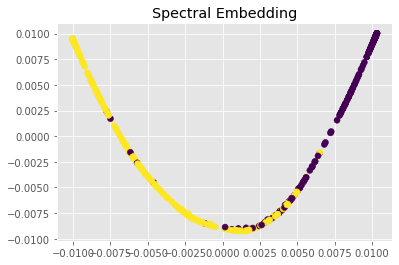

In [86]:
# Now use Spectral Embeddings to calculate the embedding of the data
# Save the embedding to spectral_embedding, and transformer to spectral
spectral_embedding = SpectralEmbedding().fit_transform(X_train)
spectral = SpectralEmbedding().fit(X_train)
#raise NotImplementedError()
plt.scatter(spectral_embedding[:, 0], spectral_embedding[:, 1], c=y_train)
plt.title("Spectral Embedding")
plt.show()

In [87]:
assert spectral
assert spectral_embedding.shape == (455, 2)

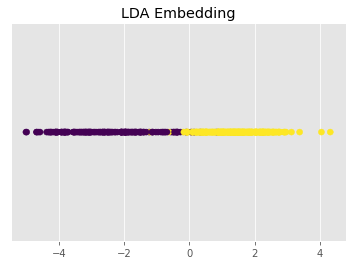

In [88]:
# Now use LDA to calculate the embedding of the data
# Save the embedding to lda_embedding, and transformer to lda
lda_embedding = LinearDiscriminantAnalysis().fit_transform(X_train, y_train)
lda = LinearDiscriminantAnalysis()
# raise NotImplementedError()
plt.scatter(lda_embedding, [0]*len(lda_embedding), c=y_train)
plt.yticks([])
plt.title("LDA Embedding")
plt.show()

In [89]:
assert lda
assert lda_embedding.shape == (455, 1)

We will now investigate how these methods perform on classification with a basic Linear SVM Classifier.

Since t-SNE, and Spectral Embedding do not save a projection, we can not transform the test data using the trained model. You will need to concatenate both X_train and X_test then select the training and test rows from the embeddings after. The [guide on merging dataframes](http://pandas.pydata.org/pandas-docs/stable/merging.html) may be useful.

For t-SNE, select a perplexity value and train a new embedding on only the test data for t-SNE. Use `n_iter` of at least 3000.

> **Optional** - Try reducing dimensionality with PCA and/or Kernel PCA and see if the results are better.

In [90]:
# Select a perplexity for t-SNE and save it to selectedPerplexity
# Create 2 embeddings `tsne_train` and `tsne_test` using a new TSNE model saved to `tsne_model`
#        fitted and transforming the whole data then manually selecting each group
# Create a LinearSVC model with default settings fitted to the training embeddings
#       save it as tsne_svc, spectral_svc, and lda_svc
selectedPerplexity = 25
tsne_model = TSNE(n_iter=3000, random_state=0, perplexity=selectedPerplexity).fit(X_test)
tsne_train = tsne_model.fit_transform(X_train)
tsne_test = tsne_model.fit_transform(X_test)
tsne_svc = LinearSVC().fit(tsne_train, y_train)
#raise NotImplementedError()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [91]:
# Create 2 embeddings `spectral_train` and `spectral_test` using a new Spectral Embedding model
#        saved to `spectral_model` fitted and transforming the whole data then manually 
#        selecting each group.
# Create a LinearSVC model with default settings fitted to the training embeddings
#       save it as spectral_svc
spectral_model = SpectralEmbedding().fit(X_train)
spectral_train = SpectralEmbedding().fit_transform(X_train)
spectral_test = SpectralEmbedding().fit_transform(X_test)
spectral_svc = LinearSVC().fit(spectral_train, y_train)
#raise NotImplementedError()

In [92]:
# Create an embedding `lda_test` from the test data using the lda model you trained
# Create a LinearSVC model with default settings fitted to the training embeddings
#       save it as lda_svc
lda_model = LinearDiscriminantAnalysis().fit(X_test, y_test)
lda_test = lda_model.fit_transform(X_test, y_test)
# lda = LinearDiscriminantAnalysis()
lda_svc = LinearSVC().fit(lda_test, y_test)
#raise NotImplementedError()

In [93]:
assert selectedPerplexity >= 2
assert selectedPerplexity <= 100
assert tsne_model
assert tsne_model.n_components == 2
assert tsne_model.perplexity == selectedPerplexity
assert tsne_model.n_iter >= 3000
assert tsne_train.shape == (455,2)
assert tsne_test.shape == (114,2)

assert spectral_model
assert spectral_model.n_components == 2
assert spectral_train.shape == (455,2)
assert spectral_test.shape == (114, 2)

assert lda_test.shape == (114, 1)

assert tsne_svc
assert tsne_svc.coef_.shape[1] == 2
assert spectral_svc
assert spectral_svc.coef_.shape[1] == 2
assert lda_svc
assert lda_svc.coef_.shape[1] == 1

In [94]:
print(f"The t-SNE embedding + Linear SVM scores an F-1 = {f1_score(y_test, tsne_svc.predict(tsne_test)):.3f}.")
print(f"The Spectral Embedding + Linear SVM scores an F-1 = {f1_score(y_test, spectral_svc.predict(spectral_test)):.3f}.")
print(f"The LDA + Linear SVM scores an F-1 = {f1_score(y_test, lda_svc.predict(lda_test)):.3f}.")

The t-SNE embedding + Linear SVM scores an F-1 = 0.822.
The Spectral Embedding + Linear SVM scores an F-1 = 0.618.
The LDA + Linear SVM scores an F-1 = 1.000.


Can you think of why we get these scores for the respective models? What happens if we train the same Linear SVM model on all the features?

In [95]:
all_feat_score = f1_score(y_test, LinearSVC().fit(X_train, y_train).predict(X_test))
print(f"The Linear SVM with all features scores an F-1 = {all_feat_score:.3f}.")

The Linear SVM with all features scores an F-1 = 0.918.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Feedback

In [96]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    return("not too easy not too hard")
    #raise NotImplementedError()